# Graded Project - Unsupervised Learning - E-Commerce

# Import the required libraries and load the data

1. Load the required libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features

In [2]:
df = pd.read_csv("renttherunway.csv", index_col=0)
df.head(5)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
print(df.shape)
df.info()

(192544, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192482 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192199 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 23.5+ MB


# Data cleansing and Exploratory data analysis

3. Check if there are any duplicate records in the dataset? If any, drop them

In [4]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
192539    False
192540    False
192541    False
192542    False
192543    False
Length: 192544, dtype: bool

In [5]:
df.duplicated().sum()

189

In [6]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
192539    False
192540    False
192541    False
192542    False
192543    False
Length: 192355, dtype: bool

4. Drop the columns which you think redundant for the analysis.

In [8]:
df = df.drop(columns = ['user_id', 'item_id', 'review_text', 'review_summary', 'review_date', 'bust size', 'body type'], axis = 1)

In [9]:
df.head(5)

,fit,weight,rating,rented for,category,height,size,age
0,fit,137lbs,10.0,vacation,romper,"5' 8""",14,28.0
1,fit,132lbs,10.0,other,gown,"5' 6""",12,36.0
2,fit,NaN,10.0,party,sheath,"5' 4""",4,116.0
3,fit,135lbs,8.0,formal affair,dress,"5' 5""",8,34.0
4,fit,145lbs,10.0,wedding,gown,"5' 9""",12,27.0


5. Check the column 'weight', Is there any presence of string data? If yes, remove
the string data and convert to float.

In [10]:
df['weight'] = df['weight'].str.replace('lbs', '')
df.head(3)

,fit,weight,rating,rented for,category,height,size,age
0,fit,137,10.0,vacation,romper,"5' 8""",14,28.0
1,fit,132,10.0,other,gown,"5' 6""",12,36.0
2,fit,NaN,10.0,party,sheath,"5' 4""",4,116.0


In [11]:
df['weight']=df['weight'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192355 entries, 0 to 192543
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192355 non-null  object 
 1   weight      162400 non-null  float64
 2   rating      192274 non-null  float64
 3   rented for  192345 non-null  object 
 4   category    192355 non-null  object 
 5   height      191680 non-null  object 
 6   size        192355 non-null  int64  
 7   age         191395 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 13.2+ MB


6. Check the unique categories for the column 'rented for' and group 'party:
cocktail' category with 'party'.

In [12]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [13]:
df['rented for'].value_counts()

wedding            57737
formal affair      40380
party              35578
everyday           16810
other              15366
work               15029
date                7382
vacation            4062
party: cocktail        1
Name: rented for, dtype: int64

In [14]:
mapping = {'party: cocktail' : 'party'}

df['rented for'] = df['rented for'].replace(mapping)
df['rented for'].value_counts()

wedding          57737
formal affair    40380
party            35579
everyday         16810
other            15366
work             15029
date              7382
vacation          4062
Name: rented for, dtype: int64

7. The column 'height' is in feet with a quotation mark, Convert to inches with
float datatype.

In [15]:
df["height"]=df["height"].str.replace('"','')
df.head(3)

,fit,weight,rating,rented for,category,height,size,age
0,fit,137.0,10.0,vacation,romper,5' 8,14,28.0
1,fit,132.0,10.0,other,gown,5' 6,12,36.0
2,fit,NaN,10.0,party,sheath,5' 4,4,116.0


In [16]:
df["height"] = (df.height.str.split("'").str[0].astype(float) * 12) + (
    df.height.str.split("'").str[1].astype(float)
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192355 entries, 0 to 192543
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192355 non-null  object 
 1   weight      162400 non-null  float64
 2   rating      192274 non-null  float64
 3   rented for  192345 non-null  object 
 4   category    192355 non-null  object 
 5   height      191680 non-null  float64
 6   size        192355 non-null  int64  
 7   age         191395 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 13.2+ MB


In [17]:
df.head(3)

,fit,weight,rating,rented for,category,height,size,age
0,fit,137.0,10.0,vacation,romper,68.0,14,28.0
1,fit,132.0,10.0,other,gown,66.0,12,36.0
2,fit,NaN,10.0,party,sheath,64.0,4,116.0


8. Check for missing values in each column of the dataset? If it exists, impute
them with appropriate methods.

In [18]:
df.isnull().sum()

fit               0
weight        29955
rating           81
rented for       10
category          0
height          675
size              0
age             960
dtype: int64

In [19]:
df['weight'].fillna(df['weight'].mean(), inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['height'].fillna(df['height'].mean(), inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['rented for']=df['rented for'].fillna('other')
# df.dropna(inplace=True)
df.isnull().sum()

fit           0
weight        0
rating        0
rented for    0
category      0
height        0
size          0
age           0
dtype: int64

9. Check the statistical summary for the numerical and categorical columns and
write your findings

In [20]:
df.describe()

,weight,rating,height,size,age
count,192355.000000,192355.000000,192355.000000,192355.000000,192355.000000
mean,137.392445,9.092327,65.310424,12.245801,33.869965
std,20.124879,1.429801,2.658883,8.496299,8.038306
min,50.000000,2.000000,54.000000,0.000000,0.000000
25%,125.000000,8.000000,63.000000,8.000000,29.000000
50%,137.392445,10.000000,65.000000,12.000000,32.000000
75%,145.000000,10.000000,67.000000,16.000000,37.000000
max,300.000000,10.000000,78.000000,58.000000,117.000000


<Axes: xlabel='fit', ylabel='rating'>

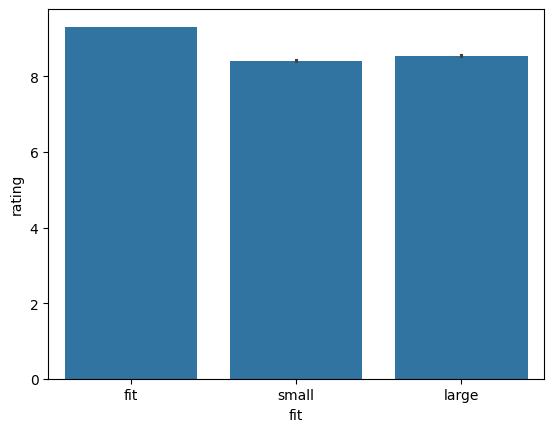

In [21]:
sns.barplot(x='fit',y='rating',data=df)

<Axes: xlabel='rented for', ylabel='count'>

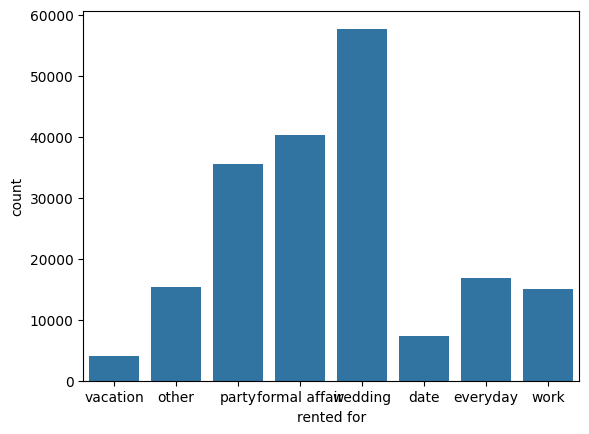

In [22]:
sns.countplot(x='rented for',data=df)

10. Are there outliers present in the column age? If yes, treat them with the
appropriate method.

<Axes: ylabel='age'>

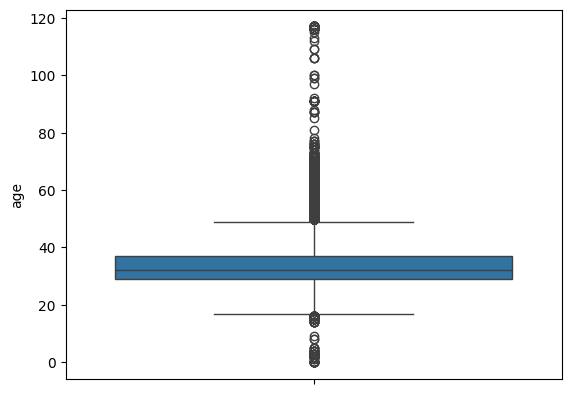

In [23]:
sns.boxplot(df['age'])

<Axes: ylabel='age'>

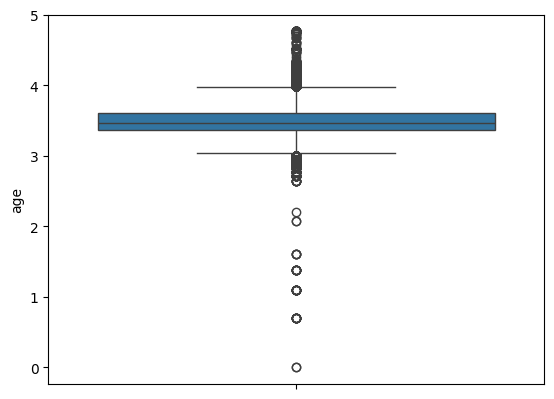

In [24]:
df['age'] = np.log(df['age'])
sns.boxplot(df['age'])

11. Check the distribution of the different categories in the column 'rented for'
using appropriate plot.

<Axes: ylabel='rented for'>

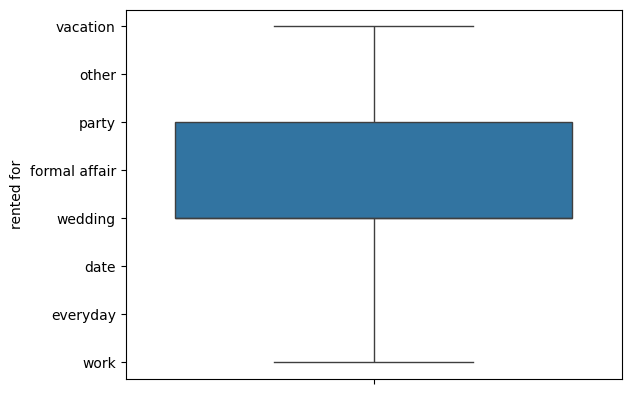

In [25]:
sns.boxplot(df['rented for'])

<Axes: xlabel='rented for', ylabel='count'>

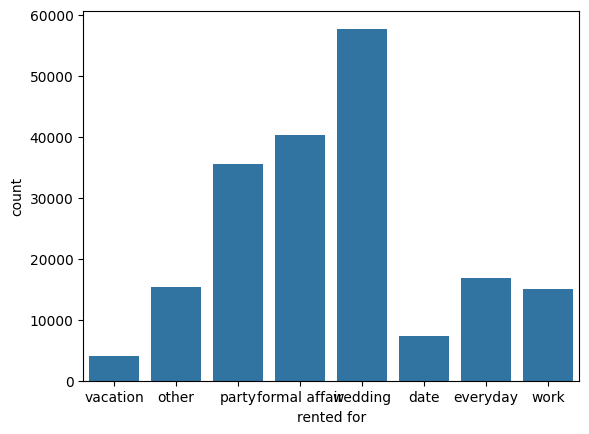

In [26]:
sns.countplot(x='rented for',data=df)

# Data Preparation for model building

12. Encode the categorical variables in the dataset.

In [27]:
cate = ['fit', 'rented for', 'category']
lbl_encoder = LabelEncoder()
for i in cate:
    df[i] = df[[i]].apply(lbl_encoder.fit_transform)

df.head(3)

,fit,weight,rating,rented for,category,height,size,age
0,0,137.000000,10.0,5,44,68.0,14,3.332205
1,0,132.000000,10.0,3,20,66.0,12,3.583519
2,0,137.392445,10.0,4,45,64.0,4,4.753590


13. Standardize the data, so that the values are within a particular range

In [28]:
df1 = df.copy()
df1 = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [29]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

scaled_features_df.head()

,fit,weight,rating,rented for,category,height,size,age
0,-0.556357,-0.019530,0.634852,0.514504,1.569388,1.011578,0.206455,-0.746060
1,-0.556357,-0.267971,0.634852,-0.456606,-0.307229,0.259378,-0.028938,0.388681
2,-0.556357,-0.000030,0.634852,0.028949,1.647580,-0.492822,-0.970509,5.671817
3,-0.556357,-0.118906,-0.763958,-0.942160,-0.619999,-0.116722,-0.499723,0.130598
4,-0.556357,0.377977,0.634852,1.000059,-0.307229,1.387678,-0.028938,-0.910268


# Principal Component Analysis and Clustering:

Text(0, 0.5, 'Explained variance ratio')

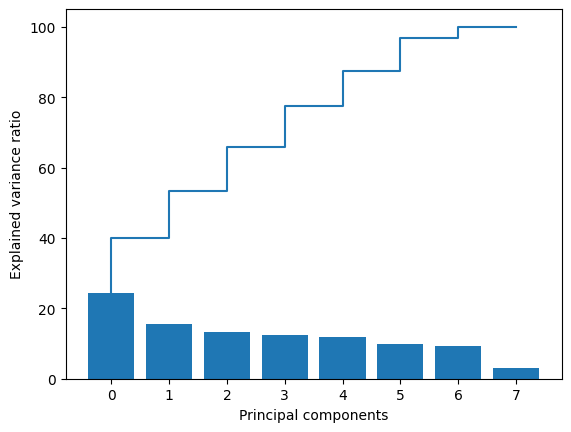

In [30]:
cov_matrix = np.cov(scaled_features.T)

eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)


plt.bar(range(8), var_exp)
plt.step(range(8), cum_var_exp)
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")

In [31]:
pca = PCA(n_components = 6)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.307984,-0.912594,-0.455600,0.987015,1.620334,-0.414622
1,-0.107329,-0.797982,-0.355948,-0.205306,-0.565617,-0.298415
2,-0.051142,0.083975,-3.382026,-4.417864,0.484956,-1.742331
3,-0.402566,0.175641,-0.320077,0.101422,-1.122700,-0.341858
4,0.558783,-1.210473,1.161091,0.759293,0.600411,-0.791370


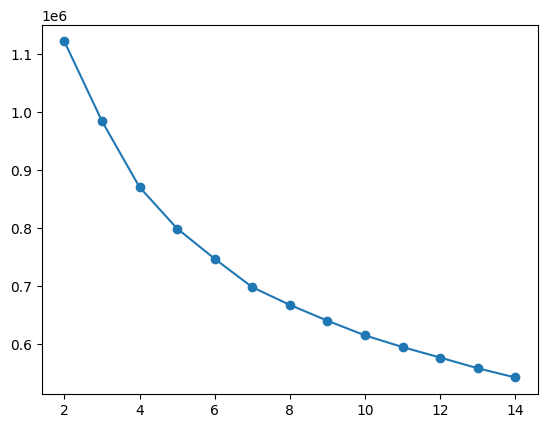

In [32]:
cluster_errors = []
cluster_range = range(2,15)

for num_clusters in cluster_range:
    cluster = KMeans(num_clusters, random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

cluster_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors': cluster_errors})

plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker = 'o')

In [33]:
kmeans = KMeans(n_clusters=5, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=5, random_state=100)

In [34]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Label
0,0.307984,-0.912594,-0.455600,0.987015,1.620334,-0.414622,3
1,-0.107329,-0.797982,-0.355948,-0.205306,-0.565617,-0.298415,0
2,-0.051142,0.083975,-3.382026,-4.417864,0.484956,-1.742331,3
3,-0.402566,0.175641,-0.320077,0.101422,-1.122700,-0.341858,0
4,0.558783,-1.210473,1.161091,0.759293,0.600411,-0.791370,1


In [35]:
kmeans_df['Label'].value_counts()

1    54102
0    42674
4    33124
3    31535
2    30896
Name: Label, dtype: int64

<Axes: >

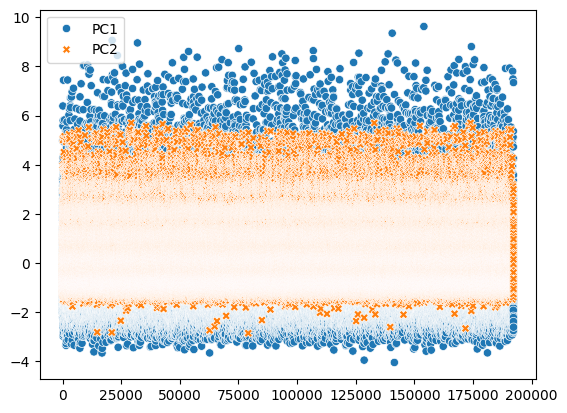

In [36]:
sns.scatterplot([kmeans_df['PC1'], kmeans_df['PC2']])

# Agglomerative clustering

In [37]:
# merge = linkage(scaled_features, method='ward')

# dendrogram(merge, leaf_rotation = 90,)

# plt.show()

In [ ]:
for i in range(2,25):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i, silhouette_score(scaled_features_df, labels))

In [ ]:
hie_cluster = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns = ['Labels'])
df_label1.head()

In [ ]:
df_hier = dfc.join(df_label1)
df_hier.head()

In [ ]:
import seaborn as sns

sns.barplot([df_hier['Labels'],df_hier['Income']])
plt.show()